Question: Are cutoff spacing and timing determined by their nonlocal effects? 

import libraries

In [2]:
import math
import matplotlib.pyplot as plt
import HKplus as hkp
import SpaceTime 
import numpy as np
import pandas as pd
import os

%matplotlib inline

Define centerline spacing

In [3]:
deltas = 50;            #spacing of nodes along centerline
pad= 100                # for centerline generation and boundary conditions

Define time variables

In [4]:
dt = 1*365*24*60*60.0     # time step (s)
saved_ts = 20               # which time steps centerline will be saved at

Define channel morphology

In [5]:
D = 10                      #constant depth for HK
W = 150                     #constant width
Cf = 0.022              # dimensionless Chezy friction factor
kl = 10/(365*24*60*60.0) # migration rate constant (m/s)
crdist = W                    # how close  banks get before cutoff in m

Set variables affecting cutoffs nonlocal effects

In [18]:
decay_rate = dt/(10*(365*24*60*60.0));   #ranges between 1/3 to 1/10, to be developed
bump_scale = 0              #to multiple kl by,amplitude of ne bump, range between 1 and 4, set to 0 for no nonlocal effects
cut_thresh = 10            #how many cutoffs to simulate

In [10]:
if bump_scale == 0:
    mode= "OnlyCurvature"
else:
    mode= "NonlocalEffects"

Choose calibrated centerline and set directory for outputs

In [13]:
#Set Result Directory
result_dir = "sample_results/" 

#Load existing Centerline
filepath ="sample_data/InitialChannel/InitialCL_10mpyr_small.csv"

load channel

In [14]:
ch = hkp.load_initial_channel(filepath, W, D, deltas)

channel object to channel belt object

In [15]:
chb = hkp.ChannelBelt(channels=[ch],cutoffs=[],cl_times=[0.0],cutoff_times=[], cutoff_dists = [], 
                      decay_rate = decay_rate, bump_scale = bump_scale, cut_thresh= cut_thresh)

plot initial channel

No handles with labels found to put in legend.


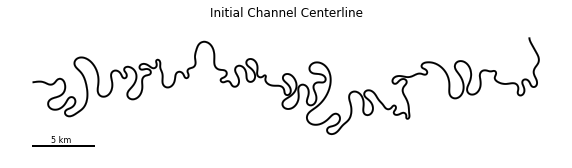

In [16]:
chb.plot_channels()
plt.title("Initial Channel Centerline")
plt.show()
#plt.savefig(result_dir+mode+"_channels_"+str(len(chb.cutoff_times))+"cutoffs.png")
#plt.close()

# Migrate and Test cutoff distributions

## *Plain HK model*

Migrate for 30 cutoffs without nonlocal effects

In [19]:
chb.migrate_cuts(saved_ts,deltas,pad,crdist,Cf,kl,dt) 

Percent: [###################-] 96% -- 2 minute(s) --

In [20]:
saved_ts

20

plot channel

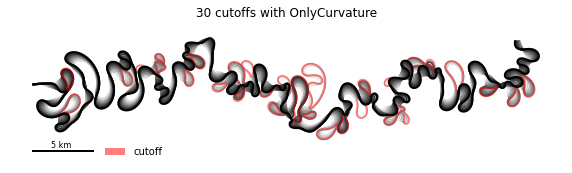

In [21]:
chb.plot_channels()
plt.title("30 cutoffs with "+ mode)
plt.show()

plot and save cutoff distributions

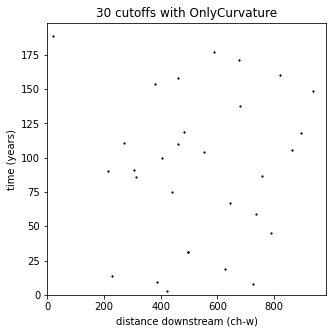

In [22]:
cutoffs = chb.cutoff_distributions(int(chb.cutoff_times[-1]), result_dir, mode)
plt.title(str(len(chb.cutoff_times))+" cutoffs with "+mode)
plt.show()

load distribution and run stats test

In [23]:
lastyear = int(np.max(cutoffs['time']))
length = int(np.max(cutoffs['downstream_distance']))



Check if data fits test criteria/boundary effects small enough to ignore

In [24]:
if lastyear >= 50**2:
    print("time span is sufficently large for statistical tests")
else:
    print("Warning: model run long enough to only search over "+str(int(np.sqrt(lastyear)))+" year windows")
        

if int(length/W) >= 50**2:
    print("centerline is sufficently long enough for statistical tests")
else: 
    print("Warning: centerline only long enough to search over " +str(int(np.sqrt(length/W)))+" ch-w windows")

Initialize Ripley's K test for 2d space-time

In [25]:
Kest = SpaceTime.RipleysKEstimator_spacetime(t_max=lastyear, d_max=length, t_min=0, d_min=0, width = W)


Run tests that output figures when complete.  

C:\Users\Josie\Desktop\Cutoffs\SpaceTime\SpaceTime.py:214: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlGn"))
  cmap.set_bad('white')


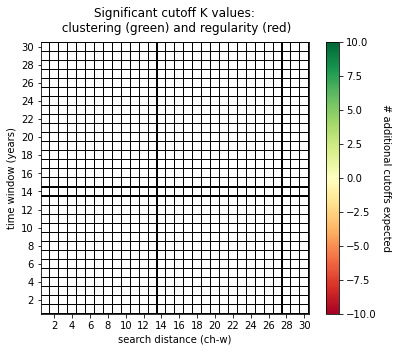

In [26]:
Kest(cutoffs= cutoffs, mode = 'K_st', max_search_d= 30,max_search_t = 30)
plt.show()